# Supervised Learning with Linear Models

This section introdcuses supervised learning with a highly common approach, namely using linear models.

Given our car example, how can we predict the price from horsepower and mileage?

|Customer Group ($x_0$)|  Mileage ($x_1$) | Power ($x_2$) | Price ($x_3$) |
|-|-|-|-|-|
|Family|  50,000 | 132 | 5,000|
|Upper Class |  10,000 | 332 | 50,000|
|Family |  80,000 | 90 | 15,000|
|$\ldots$| $\ldots$  | $\ldots$| $\ldots$ | 
|?|  500 | 4000 | ?|



## Notations and Model

Some notations. So lets denote

- every attribute with $x^{(j)}$ where $j$ is the index of the column/attribute. 
- $x_i$ as the attribute vector of the $i^{(th)}$ example, i.e. $x_i=(1, x^{(1)}, x^{(2)}, x^{(3)})$ (Note that we excluded $x_{(0)}$ for *this* example and set the first dimension to 1 as constant).

Now lets assume the price is a linear combination of power and mileage. So we can write

$$
x^{(3)}= w^{(0)} + w^{(1)} * x^{(1)} + w^{(2)} * x^{(2)} = w^T \cdot x_i
$$

with $w$ being called a weight vector resp. our **model**. Note that the first dimension represents the offset/bias.


To differentiate between dependent and independent variables a linear model is often written as:

$$
y_i = w^T \cdot x_i
$$
where subscript $i$ denotes the $i^{(th)}$ example.

<div class = "alert alert-info">
How would you adjust the weights for estimating the price?
</div>

**Observation**

1. if $y_i > w^T \cdot x_i $ &nbsp; the weights have been too low and need to be increased. 
2. if $y_i < w^T \cdot x_i $ &nbsp; the weights have been too high and need to be decreased. 
3. if $y_i < w^T \cdot x_i $ and $x_i^{(k)}>x_i^{(j)}$, then $w_i^{(k)}$ should be decreased stronger than $w_i^{(j)}$ (and vice versa for $y_i > w^T \cdot x_i $ )

**Least Mean Square Update Rule (Widrow Hoff Rule)**

To quantify the amount of increase/decrease, we can formalize the cost of predicting $y_i$ wrong as sum of the squared error (SSE).

$$
cost(w,X) = \sum_{y_i, x_i \in X}(w^T \cdot x_i-y_i)^2 = \sum_{y_i, x_i \in X}error_i(w)^2
$$ 

The optimal $w$ is obtained when the cost becomes minimal, i.e.

$$
\frac{\partial cost(w,X)}{\partial w} = 0
$$ 

Solving the partial derivation (see [Andrew Ng's Lecture notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf) for details) yields the following LMS update rule for $w$:

$$ 
w^{(k)} = w^{(k)} - \eta \cdot error_i(w) \cdot x_i^{(k)}
$$

**Batch and Stochastic Gradient Descent**

- Iterating over all examples $x_i\in X$ and applying the LMS update rule is called **stochastic gradient descent**
- Summing the error over all examples and applying the LMS update rule once for all examples is called **batch gradient descent**



## Least Mean Square Algorithm in Python







In [3]:
import sklearn
import numpy as np

In [4]:
def lms(data,eta=0.1, iterations=1000, bias=True):
    """
    data: tuple containing the data matrix x and target values y
    eta: learning rate. default is 0.1
    bias: True, if a bias term should be included
    iterations: do some fixed amount of iterations. no need for more sophisticated stopping criterions
    """
    target = data[1]
    data = data[0]
    dim = data.shape[1]         # get the number of attributes/features
    num_points = data.shape[0]
    if bias:                    # when considering the bias term we have to add w_0
        dim+=1
        data = np.concatenate(
                [
                 data, 
                 np.ones(num_points).reshape(num_points,1)
                ]
                ,axis=1)    # add bias term as attribute with value 1 for every data point
    w = np.ones(dim)    # that is the weight vector as column vector    
    for i in range(iterations):
        next = np.random.randint(num_points)  #next example to work on
        predict = np.dot(data[next,],w)       #predict the value of next based on the current hypothesis
        error = target[next]-predict          # estimate the error
        w = w + eta*error*data[next,]         # inner loop is done by numpy
    
    return w

Populating the interactive namespace from numpy and matplotlib


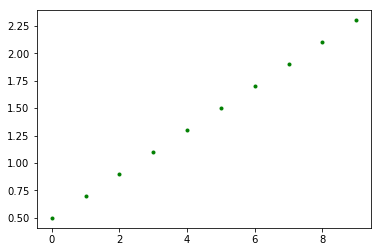

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [5]:
%pylab inline
#create data and plot it
toy = np.arange(10).reshape((10,1))
target = toy*0.2 + 0.5
plot (toy, target, 'g.')
show()
print (toy)

In [6]:
#run lms with parameters that work (see practical tips)
data_zipped = (toy,target)
print (lms(data_zipped,iterations=10000,eta=0.001))

[ 0.19650847  0.5219357 ]


[ 0.15308213  0.7767252 ]


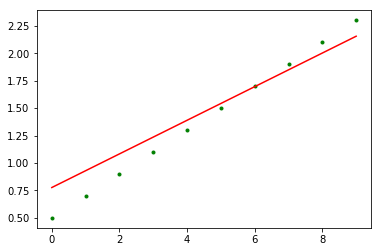

In [7]:
w = lms(data_zipped,iterations=1000,eta=0.001)
plot(toy,target,'g.')
plot(toy,toy*w[0]+w[1],'r')
print (w)
show()

##### Remarks on Parameter Settings
   * In the run above we get close, but do not find the correct solution. Increasing the number of iterations leads to the correct solution if $\eta$ is small enough. 
   * chosing $\eta$ larger needs less iterations. However, a too large $\eta$ yields too large updates and the LMS algorithm might diverge. So $\eta$ must be sufficiently small

## Exercise Least Mean Square Algorithm

Import the Boston Housing Data set in sckit learn and apply the above LMS algorithm to predict the attribute "MEDV: Median value of owner-occupied homes in \$1000's". Answer the following questions:

- How accurate is the model for predicting prices?
- How could you estimate the goodness of the fit?
- Play with the paramters to compare runtime vs. accuracy.
- Evaluate the impact of feature scaling

The solution can be found under [Boston_house_Linear_Regression.ipynb](Boston_house_Linear_Regression.ipynb)

**Notes/Code snippets to use:**

- try to start with one dimension only and compare its predictive power for a price
- plot the data with functions from below to get an idea on the data quality

In [8]:
#import the data set
import sklearn.datasets as datasets
ds = datasets.load_boston()

{'boxes': [<matplotlib.lines.Line2D at 0x7f3fad362cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3fad2f5710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fad2fcf98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fad2fc128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3fad362eb8>,
  <matplotlib.lines.Line2D at 0x7f3fad2efeb8>]}

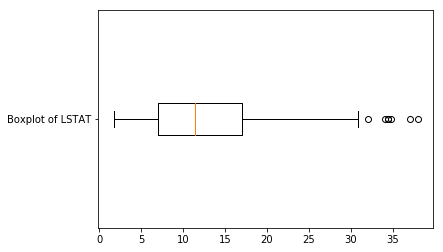

In [9]:
#do a boxplot
boxplot(ds.data[:,12],vert=False, labels=["Boxplot of " + ds.feature_names[12]])

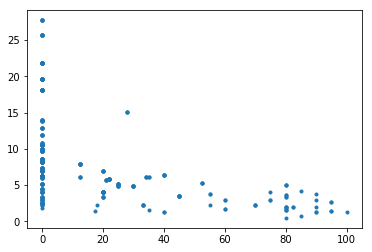

In [10]:
#plot two attributes against each other
attribute1 = 1 
attribute2 = 2 
plot(ds.data[:,attribute1],ds.data[:,attribute2],".")